<a href="https://colab.research.google.com/github/nndelgado/-proyecto_integrado_1/blob/main/EDUCACION_ARGENTINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: armaR un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes agregar más)
apellidos = ["Gómez", "Rodríguez", "Pérez", "López", "García", "Martínez", "Fernández", "González", "Díaz", "Sánchez"]
nombres = ["Juan", "María", "Carlos", "Laura", "Pedro", "Ana", "Luis", "Marta", "José", "Sofía"]


# Generar datos aleatorios
data = []
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = round(np.random.uniform(1, 10), 1)
  nota_2do_trimestre = round(np.random.uniform(1, 10), 1)
  nota_3er_trimestre = round(np.random.uniform(1, 10), 1)
  faltas = np.random.randint(0, 20)

  data.append([apellido, nombre, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear DataFrame
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,García,Marta,62496245,Inglés,5.5,7.9,5.0,8
1,Rodríguez,Laura,80576172,Educación Física,9.0,5.9,2.6,15
2,Sánchez,Carlos,18691579,Música,9.1,2.9,2.2,2
3,Díaz,Sofía,71778166,Historia,3.2,7.4,5.6,3
4,Pérez,Laura,98916764,Historia,3.7,2.9,2.6,18
...,...,...,...,...,...,...,...,...
95,Martínez,Sofía,91819322,Educación Física,3.9,9.5,6.4,9
96,López,Laura,40708511,Geografía,1.7,3.0,7.8,4
97,González,Luis,30795303,Física,5.0,1.6,4.6,0
98,Martínez,Carlos,48780639,Física,6.3,4.3,8.7,5


<ipython-input-5-f4024be02387>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(promedio_por_materia_ordenado.index, rotation=45, ha='right')


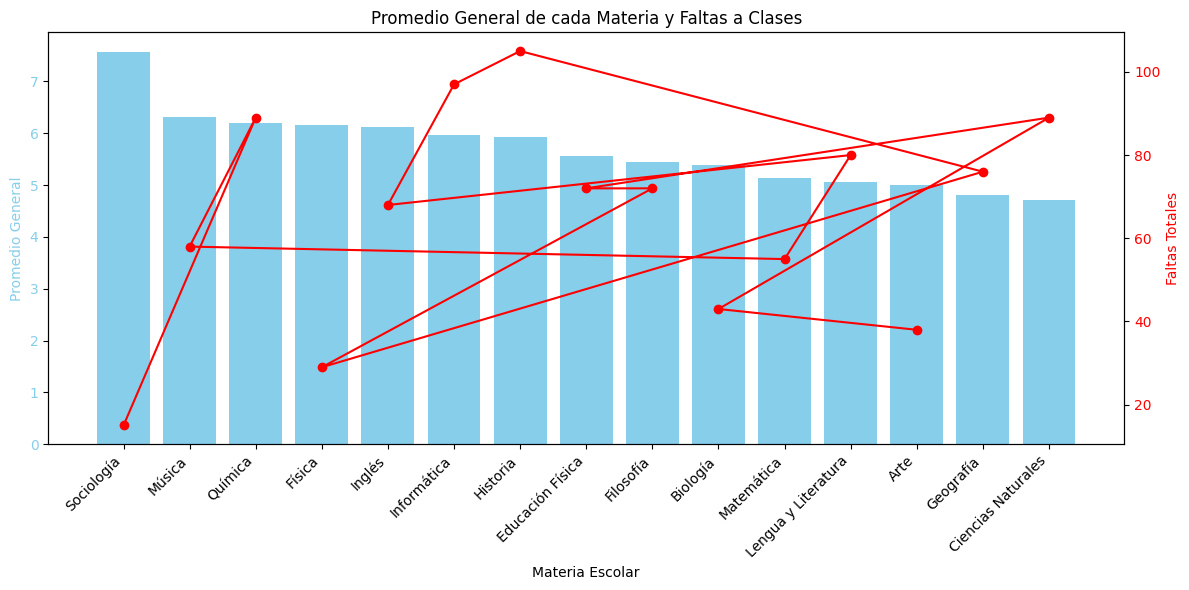

In [5]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar de mayor a menor
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio general de cada materia
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values, color='skyblue')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Materia Escolar')
ax1.set_title('Promedio General de cada Materia y Faltas a Clases')
ax1.set_xticklabels(promedio_por_materia_ordenado.index, rotation=45, ha='right')

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.tight_layout()
plt.show()

In [6]:
df.to_csv("datos_alumnos.csv", index=False)